# Machine Learning Project 1 - Seoul Bike Sharing Demand
## Antonije Petrović 1253, January 2021

Dataset: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

References:

Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 202

Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020

## 1. Loading data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

In [2]:
custom_date_parser = lambda x: datetime.strptime(x, "%d/%m/%Y")
data = pd.read_csv('SeoulBikeData.csv', 
                   parse_dates=['Date'],
                   date_parser=custom_date_parser,
                   encoding= 'unicode_escape')

This is how data originally looks like:

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## 2. Data Analysis

We can see that no data is missing:

In [4]:
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The types of the features are the following:

In [5]:
data.dtypes

Date                         datetime64[ns]
Rented Bike Count                     int64
Hour                                  int64
Temperature(°C)                     float64
Humidity(%)                           int64
Wind speed (m/s)                    float64
Visibility (10m)                      int64
Dew point temperature(°C)           float64
Solar Radiation (MJ/m2)             float64
Rainfall(mm)                        float64
Snowfall (cm)                       float64
Seasons                              object
Holiday                              object
Functioning Day                      object
dtype: object

Most of the features are continuous, but a few of them are categorical:

- **Seasons**, with possible values: *Winter*, *Spring*, *Summer*, *Autumn*
- **Holiday**, with possible values: *Holiday*, *No Holiday*
- **Functioning Day**, with possible values: *Yes*, *No*

We can see the descriptional analysis of the continious features:

In [6]:
data.describe(exclude = [object, 'datetime64'], datetime_is_numeric=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Furthermore, we can see the descriptional analysis of the categorical features:

In [7]:
data.describe(include = [object])

,Seasons,Holiday,Functioning Day
count,8760,8760,8760
unique,4,2,2
top,Summer,No Holiday,Yes
freq,2208,8328,8465


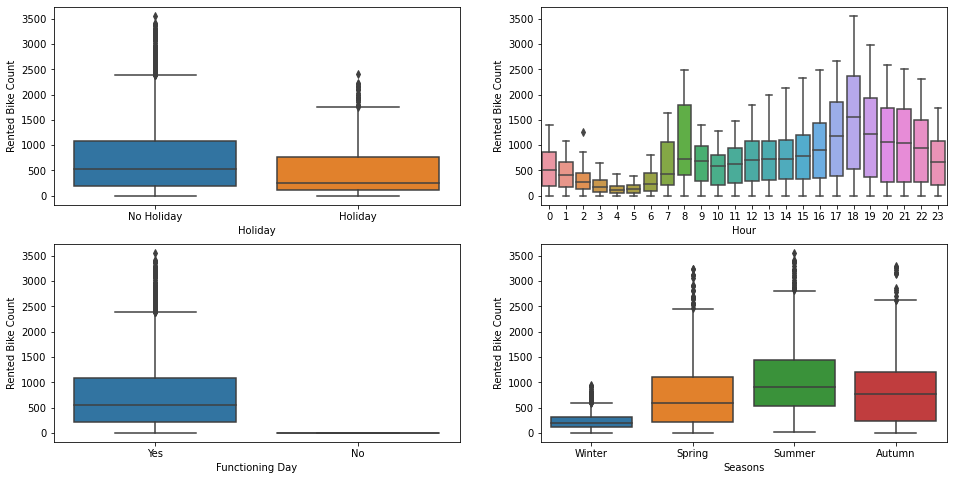

In [8]:
f,ax=plt.subplots(2, 2, figsize=(16, 8))

sb.boxplot(data=data,x="Holiday", y="Rented Bike Count", ax = ax[0,0])
sb.boxplot(data=data,x="Hour", y="Rented Bike Count", ax = ax[0,1])
sb.boxplot(data=data,x="Functioning Day", y="Rented Bike Count", ax = ax[1,0])
sb.boxplot(data=data,x="Seasons", y="Rented Bike Count", ax = ax[1,1])

plt.show()

In [9]:
result_df = data.loc[data['Functioning Day'] == 'No']
len(result_df)

295

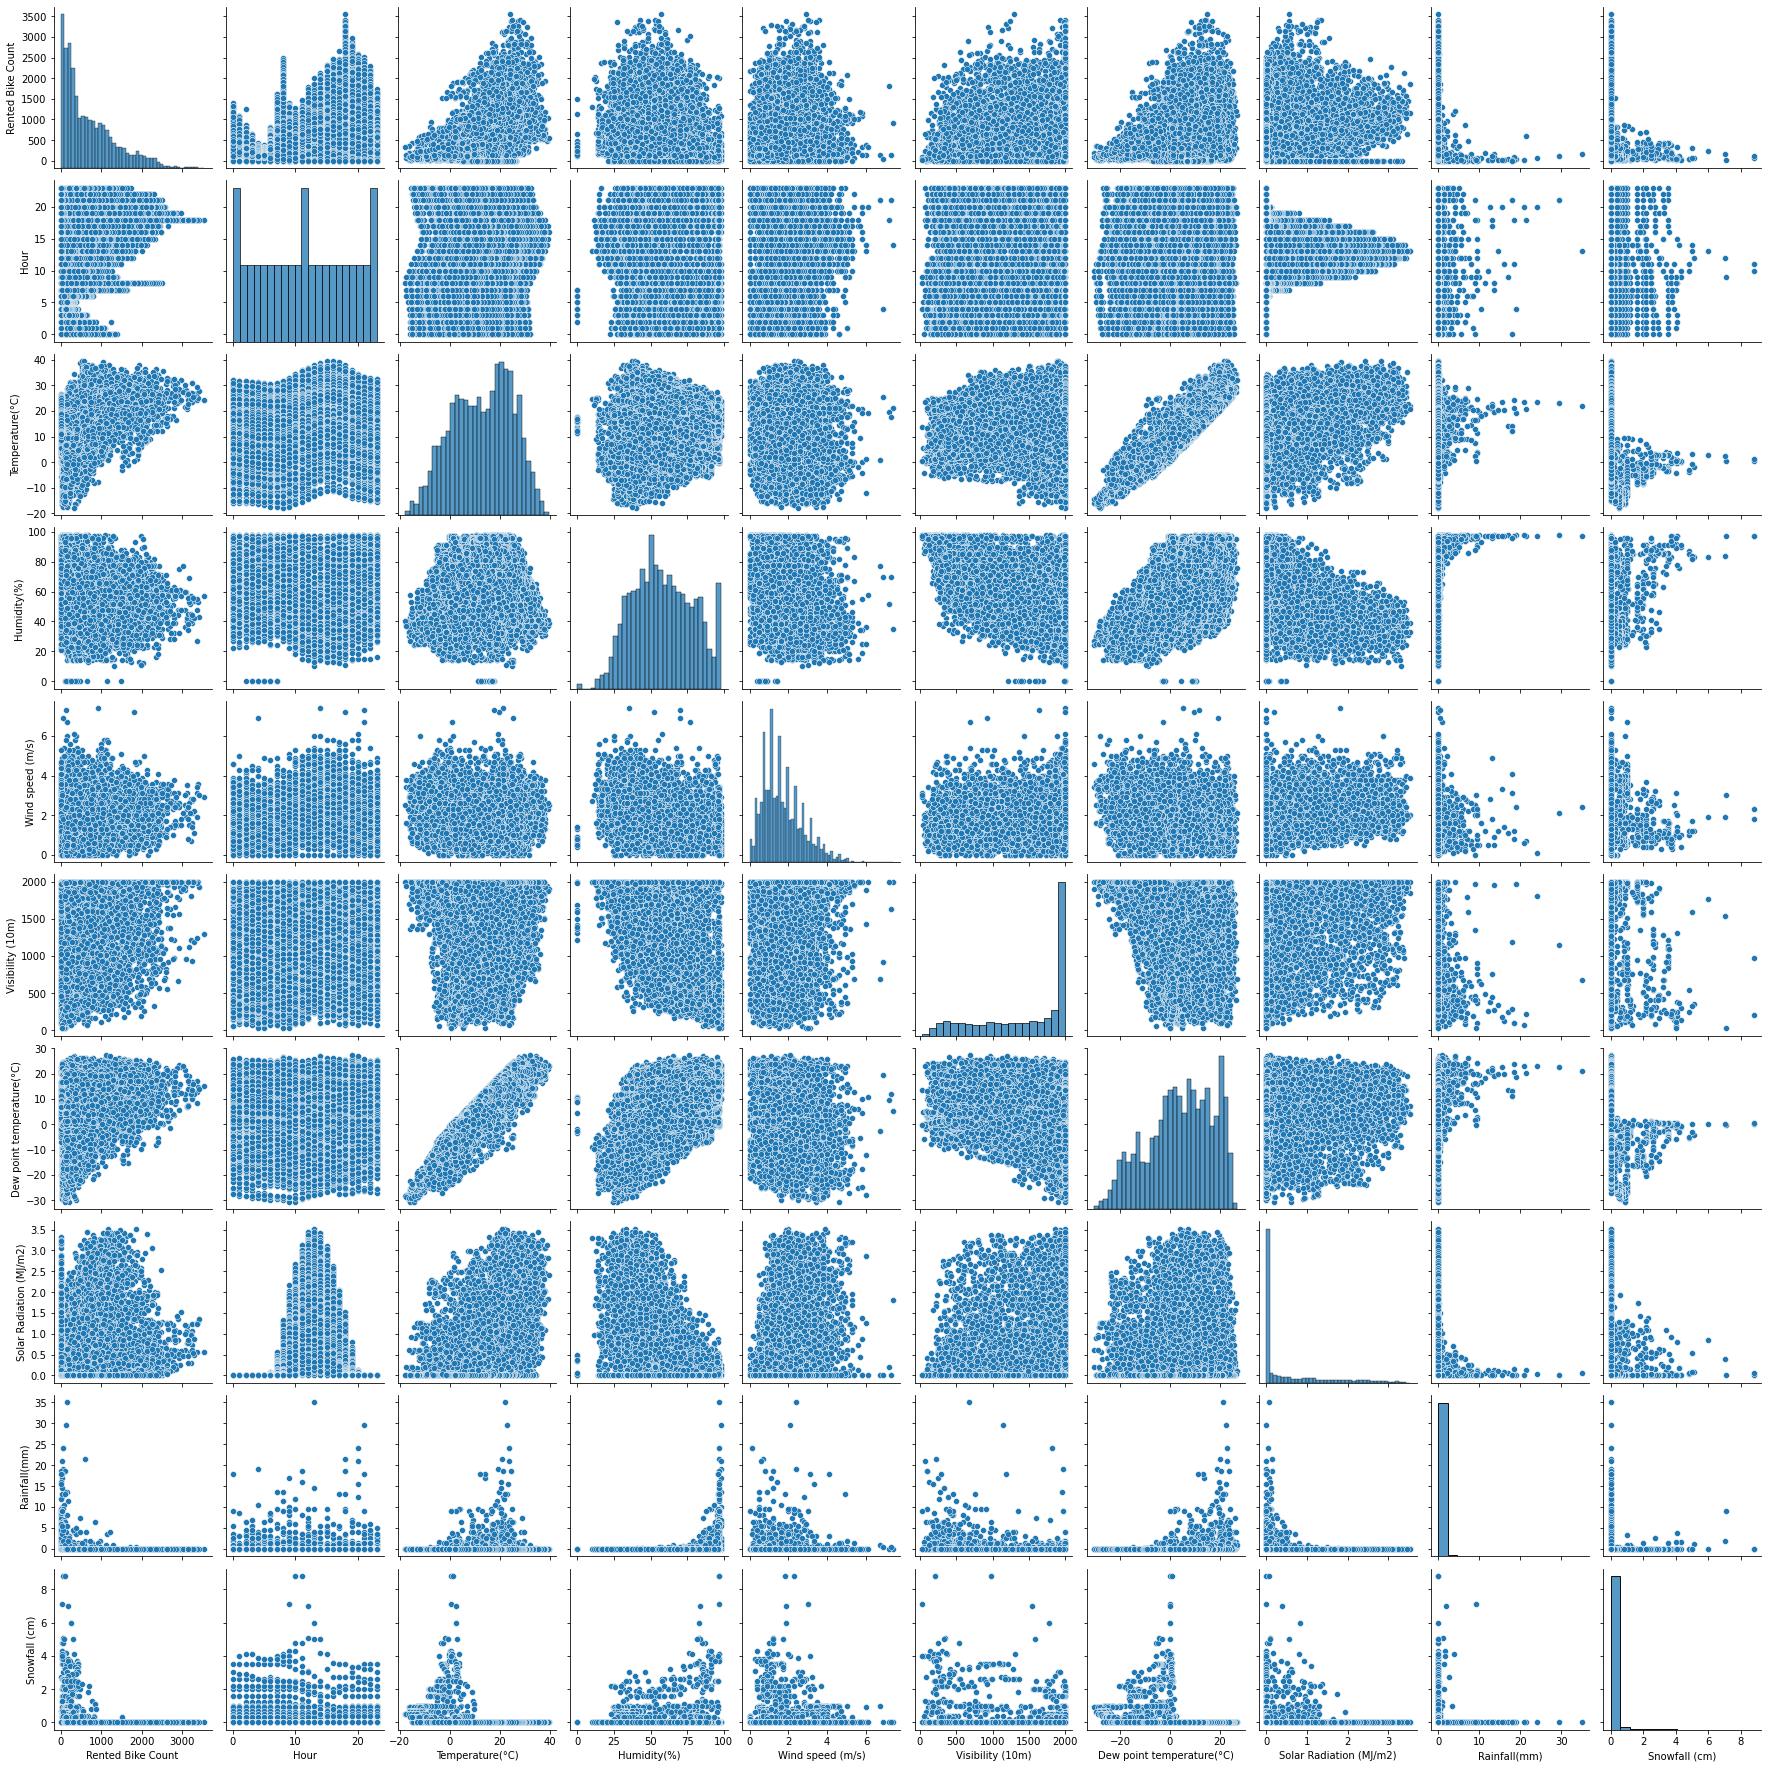

In [10]:
numerical_data = data.select_dtypes(include=['float64', 'int64'])
sb.pairplot(numerical_data)
plt.show()

<AxesSubplot:>

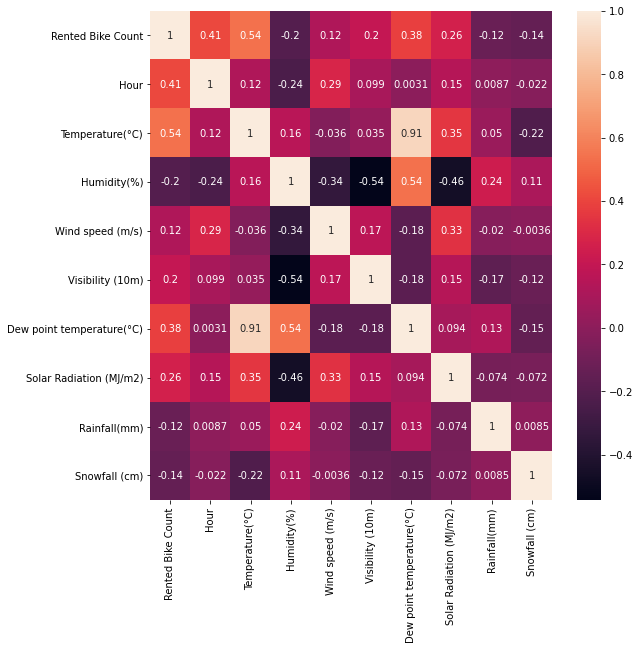

In [11]:
plt.subplots(figsize=(9, 9))
corr = data.corr()
sb.heatmap(corr, 
           annot=True,
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values)

In [12]:
# Delete correlated column
data = data.drop(columns = ['Dew point temperature(°C)', 'Date' ])

In [13]:
data2 = pd.get_dummies(data, prefix_sep='_', drop_first=True)
data2.head()

In [26]:
from sklearn.model_selection import train_test_split  
x = data2.iloc[:, 2:].values
y = data2.iloc[:, 1].values
print("X and Y ready")

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=0)  
print("Splitting done.")

from sklearn import linear_model
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
regr = linear_model.LinearRegression()
scoring = ['neg_mean_squared_error', 'r2']
results = model_selection.cross_validate(regr, x, y, cv=kfold, scoring=scoring, return_train_score=True)
print(results['test_neg_mean_squared_error'])
print(results['test_r2'])

X and Y ready
Splitting done.
[-38.25393314 -41.49564802 -41.24647348 -37.4783638  -40.62375798
 -40.02471745 -40.13657371 -38.01152803 -37.88694572 -42.80453203]
[0.16320717 0.1635238  0.15304257 0.1842115  0.16935023 0.17330631
 0.17957526 0.17286077 0.20303489 0.12280302]


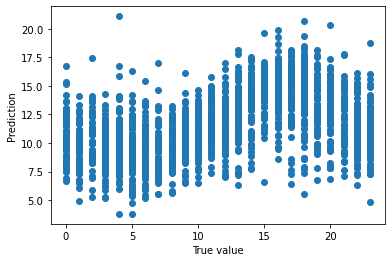

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("True value")
plt.ylabel('Prediction')
plt.show()